In [8]:
%matplotlib inline

In [9]:
import numpy as np
import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import scipy.misc
import time

In [10]:
import pylab
pylab.rcParams['figure.figsize'] = (12.0, 12.0)

#### Load data. 

In [11]:
def load_training_img(index, file_path, file_prefix):
    return scipy.misc.imread(file_path + file_prefix + str(index).zfill(6) + '.png')[:,:,:-1]

def load_images(lower, upper, file_path, file_prefix):
    return np.asarray([load_training_img(i, file_path, file_prefix) 
                        for i in range(lower, upper)])

def normalize_and_flatten(imgs):
    return (imgs / 255.0).reshape(imgs.shape[0], imgs.shape[1]*imgs.shape[2]*imgs.shape[3])

In [20]:
file_path_images = '../../../factory-robot-data/imgs_2015-09-28/'
file_prefix_images = 'capture'
n_train = 10000
n_test = 1000
n_images = n_train + n_test 
images = normalize_and_flatten(load_images(0, n_images, file_path_images, file_prefix_images))

train_images = images[:n_train]
test_images = images[n_train:]

#### Fit PCA 

In [43]:
n_components = 75
pca = PCA(n_components=n_components)

In [44]:
start_time = time.time()
pca.fit(train_images)

print 'elapsed time: %f s' % (time.time() - start_time)

elapsed time: 488.825732 s


In [45]:
import cPickle

In [46]:
cPickle.dump(pca, open('pickled_pca_75', 'wb'))

In [47]:
transformed_images = pca.inverse_transform(pca.transform(test_images))
transformed_images = np.maximum(0, np.minimum(1, transformed_images))

In [50]:
f = lambda x: pca.transform(x)[0]
f(test_images[0])

array([  2.38556090e+00,   7.90418193e+00,   2.02525737e+00,
        -3.87979271e+00,  -1.04565836e+00,  -3.62417156e-01,
        -2.79758834e-01,  -2.34295330e+00,  -1.44695574e+00,
         2.19084973e+00,  -1.20427596e-01,  -6.53576004e-01,
        -6.98529997e-01,   1.89281857e+00,  -5.45192003e+00,
        -2.03996604e+00,  -6.77532276e-01,  -4.66019015e+00,
        -3.28566865e+00,   1.52501327e+00,   3.04356945e-01,
        -8.66042856e-01,   1.31345909e+00,  -4.25365904e-01,
         1.70122735e-01,  -4.81998527e-01,   4.32217332e-01,
        -1.28433856e-01,  -6.46722823e-01,  -1.09804117e+00,
         1.00961896e+00,   1.75158064e+00,  -1.71715114e+00,
        -7.78700622e-01,   2.54559708e-02,  -1.74356256e+00,
        -1.36874746e-01,  -2.98695862e-01,  -4.05573506e-01,
         9.63944397e-01,  -8.24830155e-01,   1.58123953e+00,
         9.86135367e-01,  -9.25105976e-01,  -8.43923466e-01,
         6.19071843e-01,   6.74345157e-01,  -7.54567024e-01,
        -2.21044182e-01,

In [34]:
pca2 = cPickle.load(open('pickled_pca'))
transformed_images = pca2.inverse_transform(pca2.transform(test_images))
transformed_images = np.maximum(0, np.minimum(1, transformed_images))

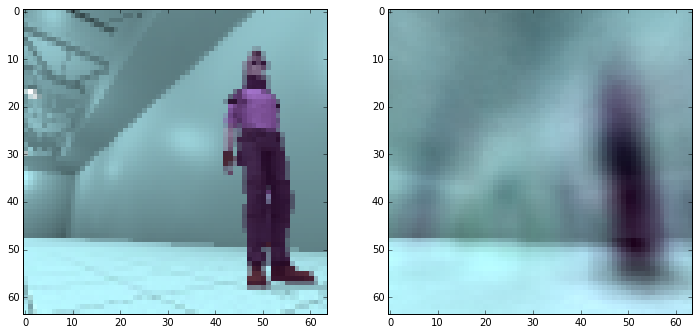

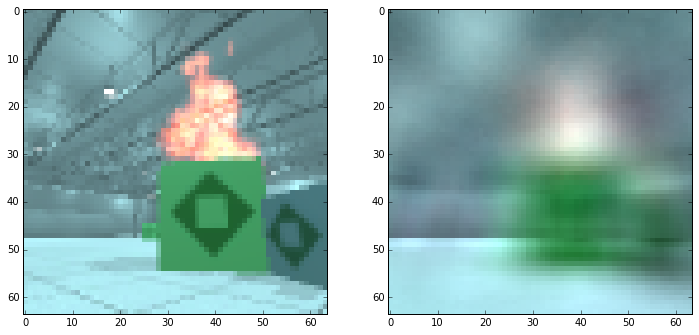

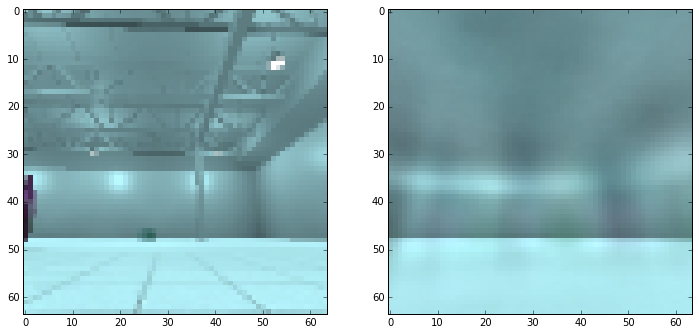

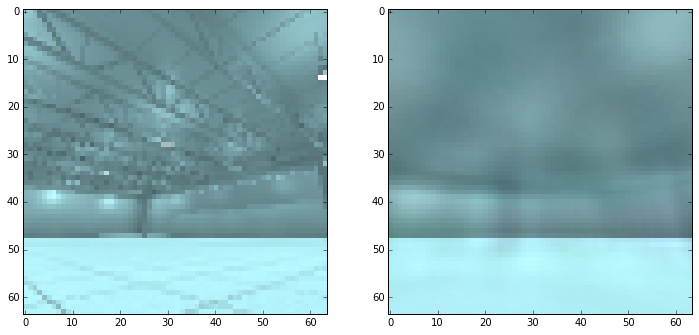

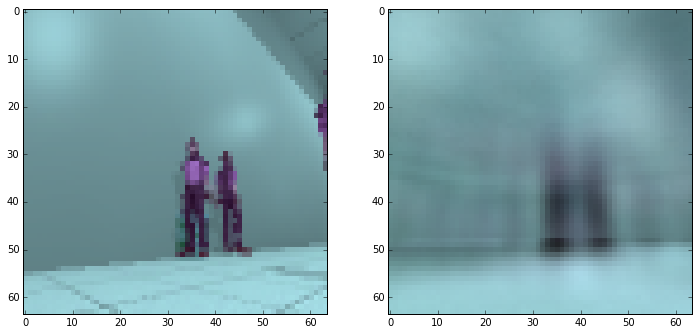

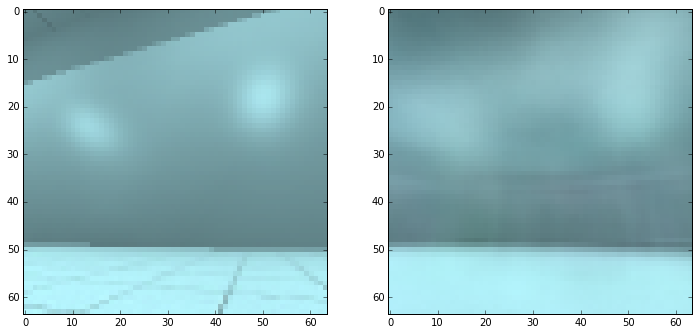

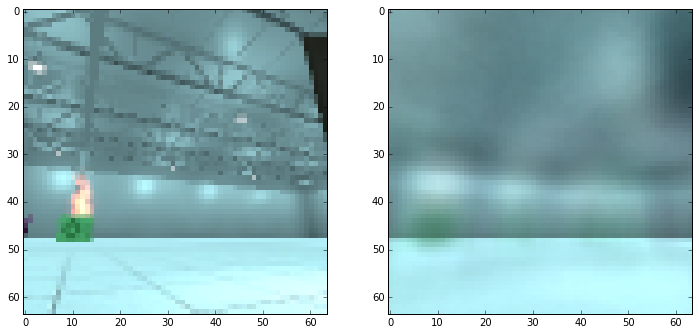

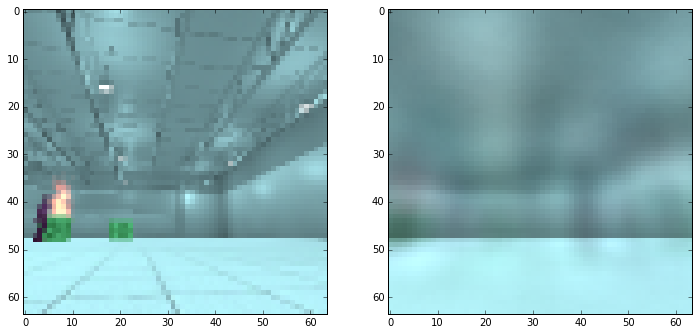

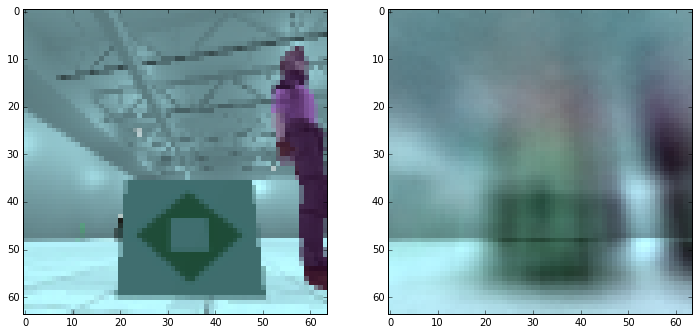

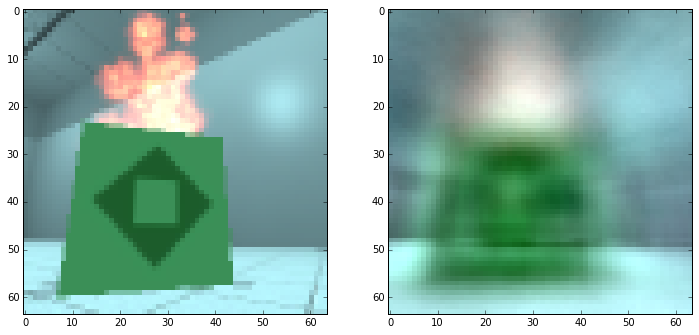

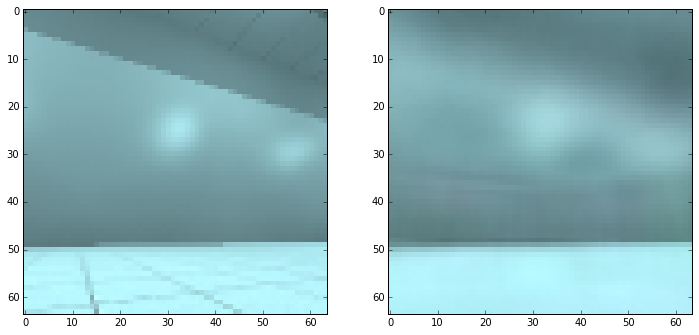

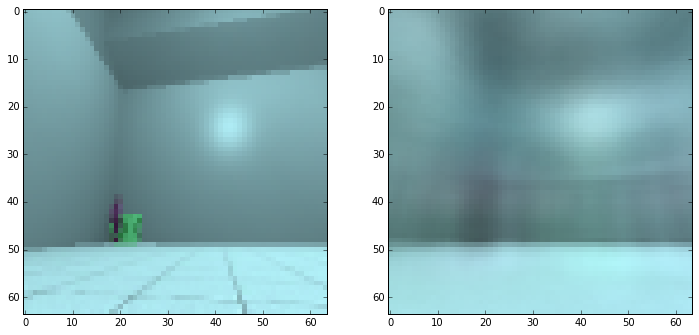

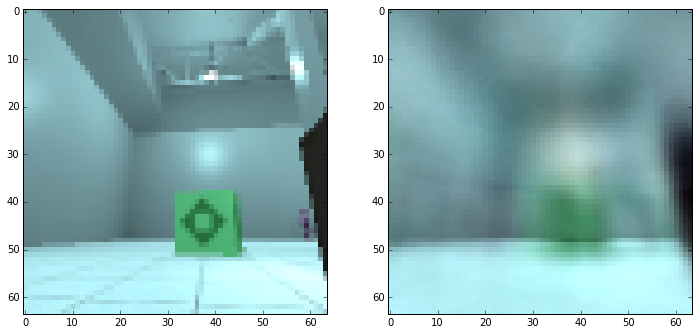

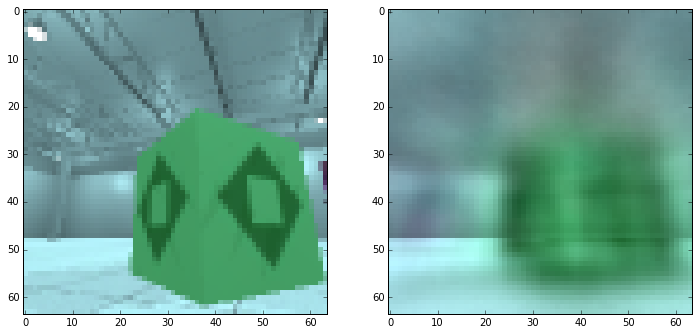

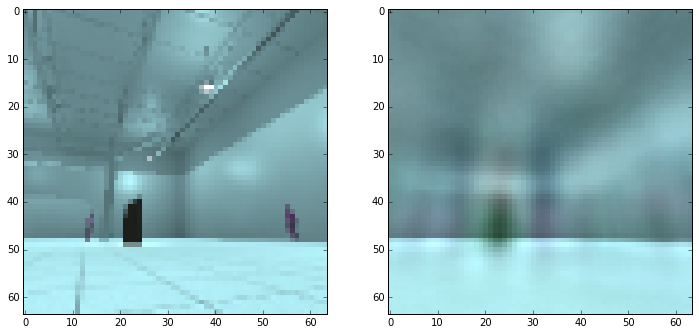

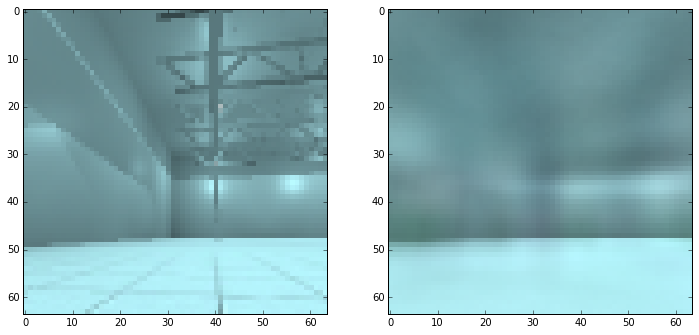

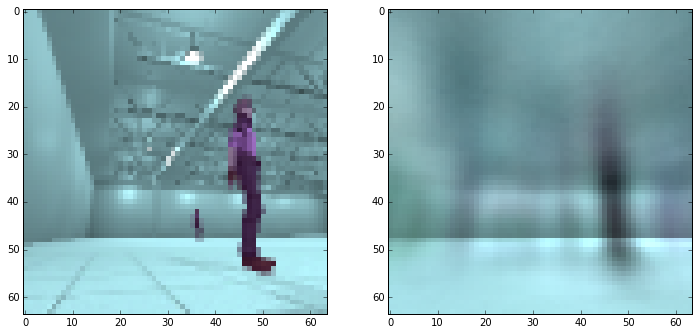

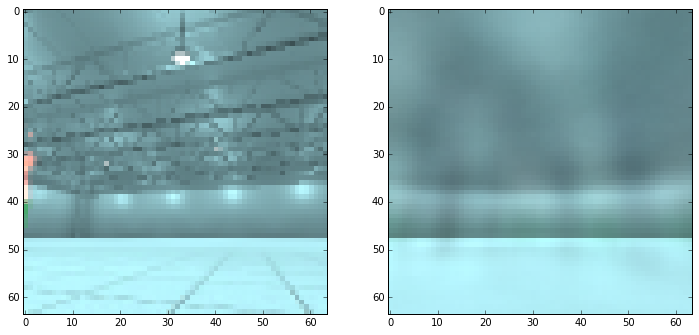

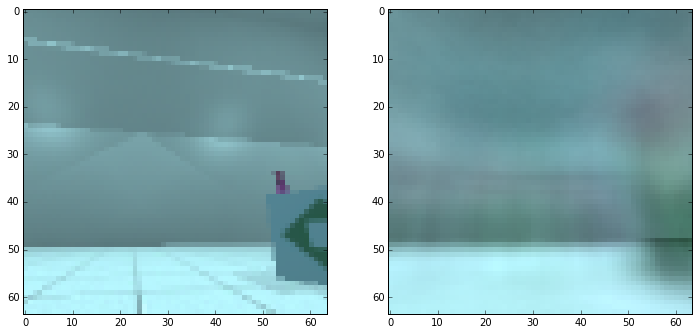

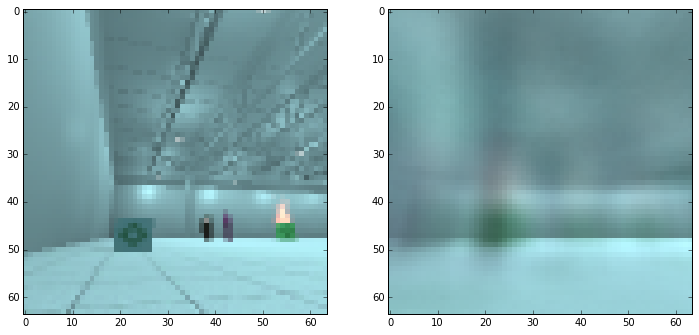

In [51]:
n_display = 20
for i, (image, transformed_image) in enumerate(zip(test_images[:n_display], transformed_images[:n_display])):
    f, axarr = plt.subplots(1, 2)
    axarr[0].imshow(image.reshape(64, 64, 3), interpolation='nearest')
    axarr[1].imshow(transformed_image.reshape(64, 64, 3), interpolation='nearest')
    
    f.savefig('results/n_train'+ str(n_train) + 'n_components' + str(n_components) + '_' + str(i) + '.png')
    plt.show()

### Recall time 

In [ ]:
for eigenimage in eigenimages:
    plt.imshow(eigenimage.reshape(64, 64, 3), interpolation='nearest')
    plt.show()

In [ ]:
# plt.imshow(test_images[0].reshape(64, 64, 3), interpolation='nearest')
# plt.show()
# print pca.transform(test_images[0])

# encoding = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
# decoding = pca.inverse_transform(encoding)
print plt.imshow(((eigenimages[0] - eigenimages[6])*4 + 0.5).reshape(64, 64, 3), interpolation='nearest')
